#### Data collection and loading

In [231]:

# importing lib 
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE

In [232]:
# load the data
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### Data PreProcessing

In [234]:
# check whether this data contains null / categorical value
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [236]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### To check the outliers

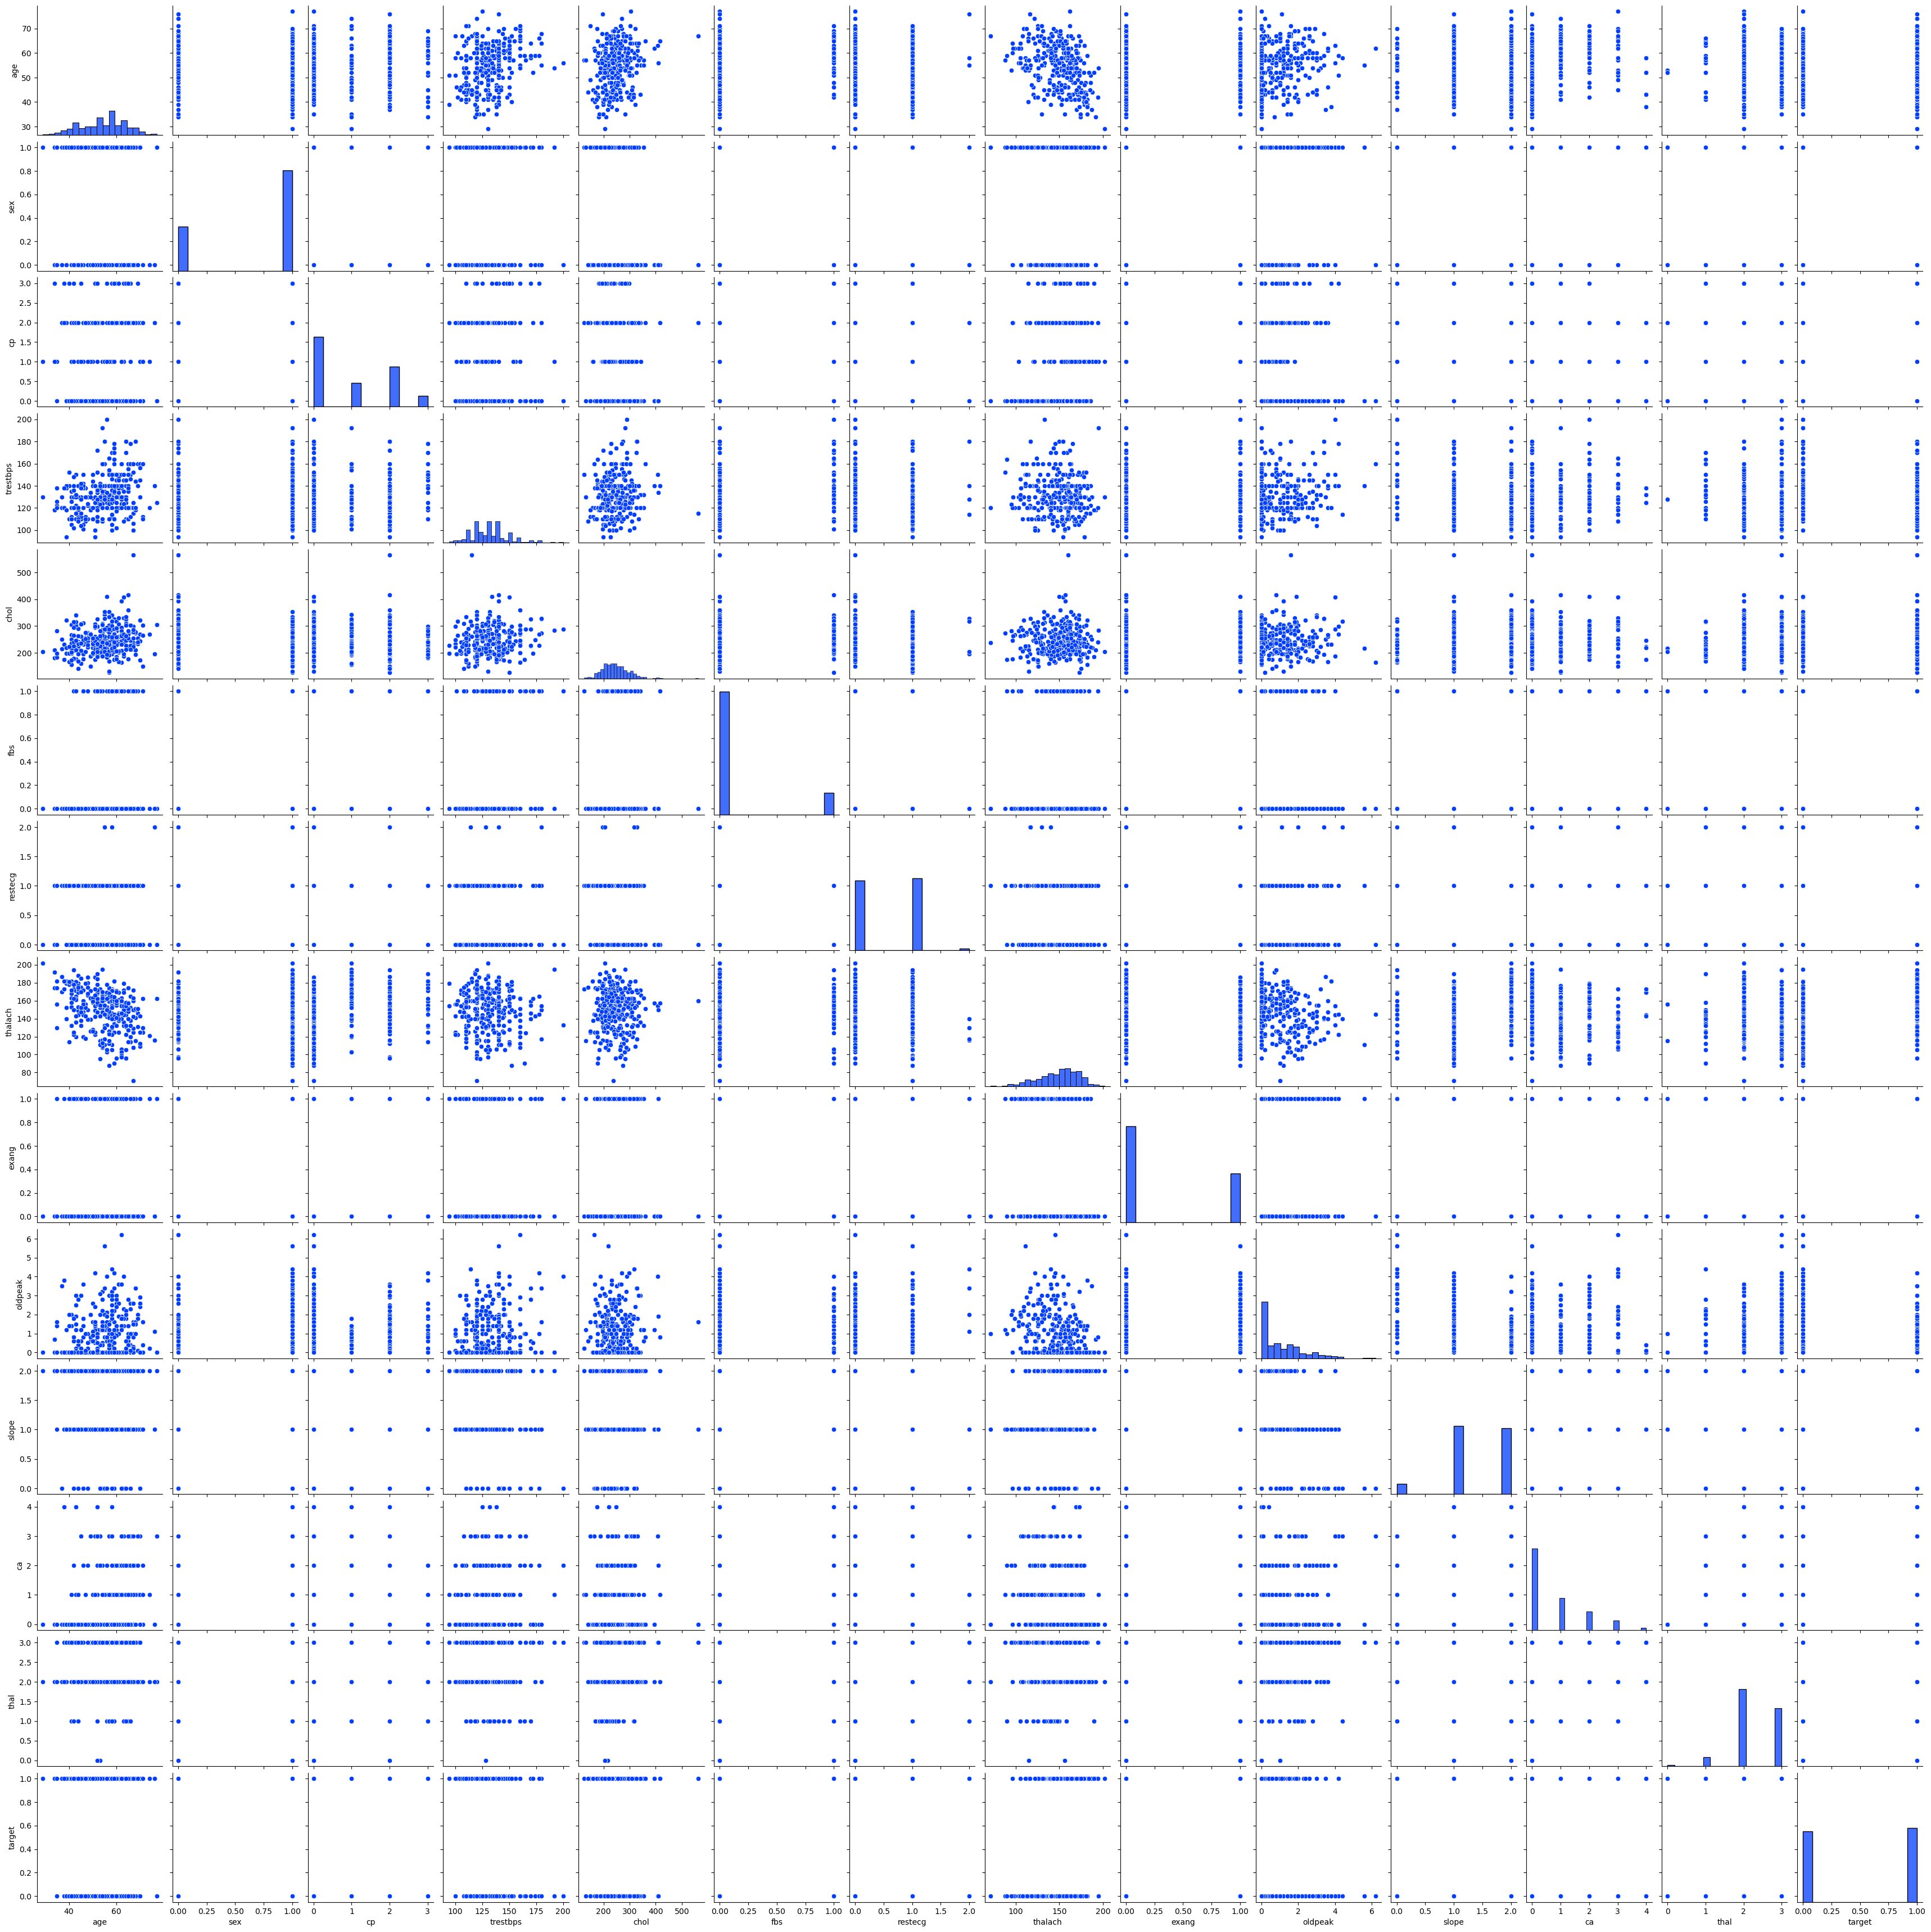

In [238]:

import seaborn as sns
sns.pairplot(dataset)

#### Creating a table with statistical values.

In [240]:

# import numpy as np

descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive

C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\1811816981.py:6: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\1811816981.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Mean,54.434146,0.69561,0.942439,131.611707,246.0,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
Median,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Mode,58,1,0,120,204,0,1,162,0,0.0,1,0,2,1
Q1:25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
Q2:50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Q3:75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
99%,71.0,1.0,3.0,180.0,407.0,1.0,2.0,192.0,1.0,4.352,2.0,4.0,3.0,1.0
Q4:100%,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
IQR,13.0,1.0,2.0,20.0,64.0,0.0,1.0,34.0,1.0,1.8,1.0,1.0,1.0,1.0
1.5 rule,19.5,1.5,3.0,30.0,96.0,0.0,1.5,51.0,1.5,2.7,1.5,1.5,1.5,1.5


#### Checking whether this data contains outlier's or not if present change the outlier to null.

In [242]:
col = dataset.columns

In [243]:

lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname) 

In [244]:
lesser



['thalach', 'thal']

In [245]:

greater

['trestbps', 'chol', 'fbs', 'oldpeak', 'ca']

In [246]:
for columnname in greater:
    dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]

C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\741910437.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\741910437.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy

In [247]:
for columnname in lesser:
    dataset[columnname][dataset[columnname]<descriptive[columnname]["Lesser Outlier"]]=descriptive[columnname]["Lesser Outlier"]

C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\4049593531.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\4049593531.py:2: SettingWithCopyWarning:


A value is trying to be set on a co

In [248]:
import numpy as np

descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\3876638240.py:6: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\3876638240.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Mean,54.434146,0.69561,0.942439,131.260488,244.981463,0.0,0.529756,149.153171,0.336585,1.062244,1.385366,0.694146,2.327317,0.513171
Median,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Mode,58,1,0,120,204,0,1,162,0,0.0,1,0.0,2.0,1
Q1:25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
Q2:50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Q3:75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
99%,71.0,1.0,3.0,170.0,371.0,0.0,2.0,192.0,1.0,4.352,2.0,2.5,3.0,1.0
Q4:100%,77.0,1.0,3.0,170.0,371.0,0.0,2.0,202.0,1.0,4.5,2.0,2.5,3.0,1.0
IQR,13.0,1.0,2.0,20.0,64.0,0.0,1.0,34.0,1.0,1.8,1.0,1.0,1.0,1.0
1.5 rule,19.5,1.5,3.0,30.0,96.0,0.0,1.5,51.0,1.5,2.7,1.5,1.5,1.5,1.5


In [249]:
lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname) 

In [250]:
greater

[]

In [251]:
lesser

[]

In [252]:

dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203,0,0,155,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294,0,1,106,0,1.9,1,2.5,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2.0,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3.0,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2.0,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2.0,1


In [253]:

dataset['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [254]:
counts = dataset['target'].value_counts().reset_index()
counts.columns = ['target', 'Count']
counts

,target,Count
0,1,526
1,0,499


In [255]:
import plotly.express as px
import plotly.io as pl

# Creating the bar plot using Plotly Express
fig = px.bar(counts, x='target', y='Count', 
             color = 'Count',
             labels={'target': 'Diseased/No diseased', 'Count': 'Count'},
             title='Count of diseases and not diseased')

fig.show()

In [256]:
# !pip install nbformat --upgrade

In [257]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [258]:
d_col = ['age','sex','cp']

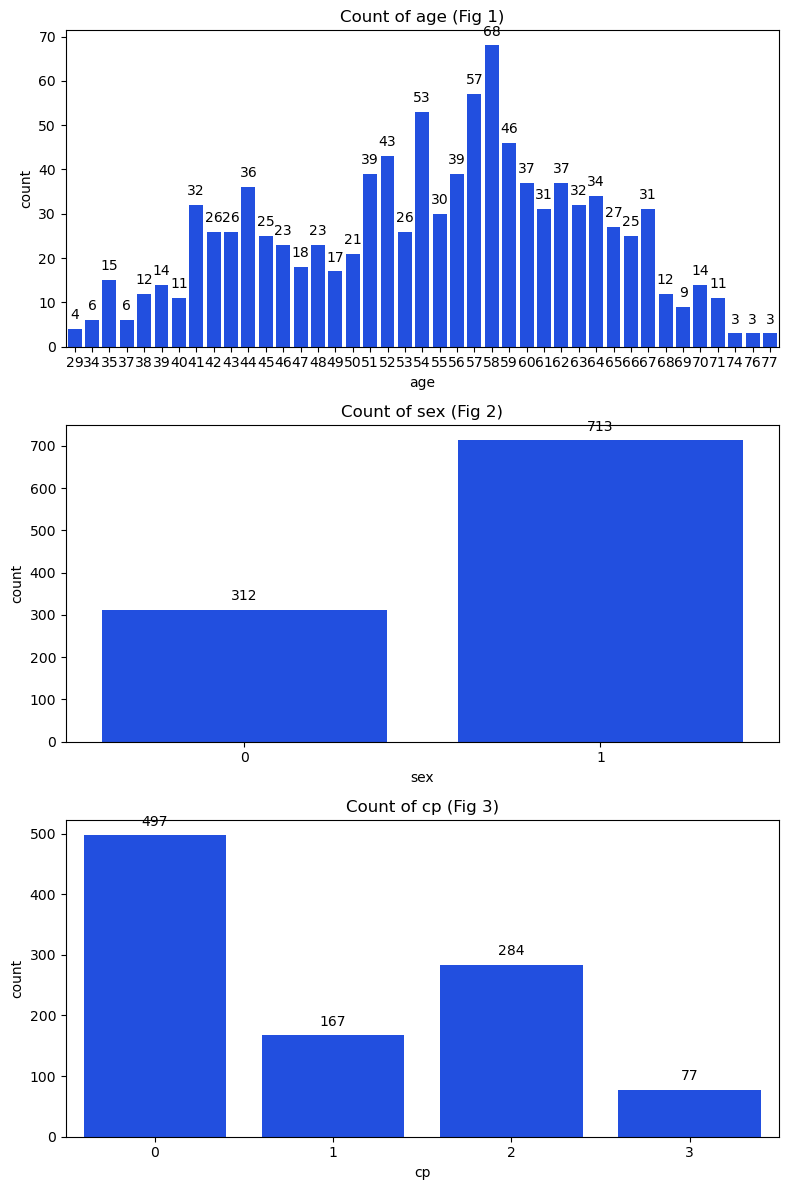

In [259]:
# univariate analysis of categorical data:
sns.set_palette('bright')
fig, ax = plt.subplots(len(d_col),1,figsize =(8, 4*len(d_col)))

for i, col in enumerate(d_col):
    sns.countplot(data=dataset, x=col,ax=ax[i])
    # Set the title of the entire figure
    ax[i].set_title(f'Count of {col} (Fig {i+1})')
    
    # Annotate each bar with its count
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'),  # is used to label each bar in the count plot with its count.
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')
plt.tight_layout()  # Ensures plots are properly spaced
plt.show()

<Axes: >

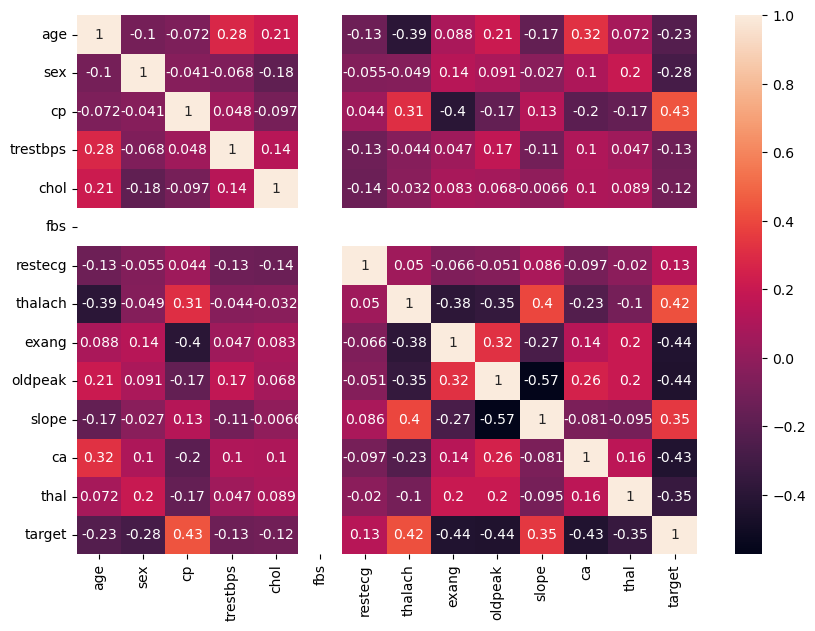

In [260]:
import seaborn as sns
plt.figure(figsize=(10,7))
corr_mat = dataset.corr()
sns.heatmap(corr_mat, annot=True)

#### Feature selection

In [262]:
# RFE
def rfefeature(indep_X,dep_Y,n):
    rfelist =[]
    selected_features = {}

    log_model = LogisticRegression(solver='lbfgs')
    svm_model = SVC(kernel='linear',random_state =0)
    dt_model = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    rf_model = RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
#     nb_model = GaussianNB(priors=None)
    rfemodellist = [log_model,svm_model,dt_model,rf_model]
    for model in rfemodellist:
        print(model)
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        log_rfe = RFE(estimator=model, n_features_to_select=n)
        print(log_rfe)
        log_fit = log_rfe.fit(indep_X,dep_Y)
        log_rfe_feature= log_fit.transform(indep_X)
        selected_columns = indep_X.columns[log_rfe.support_].tolist()
        selected_features[model.__class__.__name__] = selected_columns
        rfelist.append(log_rfe_feature)
    return rfelist,selected_features

In [263]:

def split_scalar(indep_X,dep_Y):
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size=0.30,random_state=0)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test,Y_train,Y_test

In [264]:
def cm_pred(classifier,X_test):
    test_pred = classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,test_pred)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    
    accuracy = accuracy_score(Y_test,test_pred)
    
    report = classification_report(Y_test,test_pred)
    return classifier,accuracy,report,X_test,Y_test,cm

In [265]:
def log(X_train,X_test,Y_train):
    classifier = LogisticRegression(random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def svm(X_train,X_test,Y_train):
    classifier = SVC(kernel='linear',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def dtree(X_train,X_test,Y_train):
    classifier = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def random(X_train,X_test,Y_train):
    classifier =RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def nb(X_train,X_test,Y_train):
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def knn(X_train,X_test,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    classifier,accuracy,report,X_test,Y_test,cm=cm_pred(classifier,X_test)
    return  classifier,accuracy,report,X_test,Y_test,cm

In [266]:
def rfe_classification(acclog,accsvm,accdtree,accrandom,accnb,accknn):
    rfe_df =pd.DataFrame(index =['Logistic','SVM','DecisionTree','RandomForest',],columns = ['Logistic','SVM','DecisionTree','RandomForest','NavieBayes','KNN'])
    for number,idex in enumerate(rfe_df.index):
        rfe_df['Logistic'][idex]=acclog[number]
        rfe_df['SVM'][idex]=accsvm[number]
        rfe_df['DecisionTree'][idex]=accdtree[number]
        rfe_df['RandomForest'][idex]=accrandom[number]
        rfe_df['NavieBayes'][idex]=accnb[number]
        rfe_df['KNN'][idex]=accknn[number]

    return rfe_df

In [267]:
indep_X = dataset.drop('target',axis =1)
dep_Y = dataset['target']
rfelist,selected_features= rfefeature(indep_X,dep_Y,7)
acclog=[]
accsvm=[]
accdtree=[]
accrandom=[]
accnb=[]
accknn=[]

for i in rfelist:
    X_train,X_test,Y_train,Y_test = split_scalar(i,dep_Y)
    classifier,accuracy,report,X_test,Y_test,cm =log(X_train,X_test,Y_train)
    acclog.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =svm(X_train,X_test,Y_train)
    accsvm.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =dtree(X_train,X_test,Y_train)
    accdtree.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =random(X_train,X_test,Y_train)
    accrandom.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =nb(X_train,X_test,Y_train)
    accnb.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =knn(X_train,X_test,Y_train)
    accknn.append(accuracy)
    
result = rfe_classification(acclog,accsvm,accdtree,accrandom,accnb,accknn)
result

LogisticRegression()
RFE(estimator=LogisticRegression(), n_features_to_select=7)
SVC(kernel='linear', random_state=0)
RFE(estimator=SVC(kernel='linear', random_state=0), n_features_to_select=7)


C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ashis\anaconda3\Lib\site-packages

DecisionTreeClassifier(max_features='sqrt', random_state=0)
RFE(estimator=DecisionTreeClassifier(max_features='sqrt', random_state=0),
    n_features_to_select=7)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
RFE(estimator=RandomForestClassifier(criterion='entropy', n_estimators=10,
                                     random_state=0),
    n_features_to_select=7)


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\737070911.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\ashis\AppData\Local\Temp\ipykernel_28968\737070911.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change i

,Logistic,SVM,DecisionTree,RandomForest,NavieBayes,KNN
Logistic,0.87013,0.873377,0.961039,0.961039,0.87013,0.87013
SVM,0.87013,0.873377,0.961039,0.961039,0.87013,0.87013
DecisionTree,0.873377,0.87987,0.99026,1.0,0.86039,0.847403
RandomForest,0.853896,0.86039,1.0,1.0,0.847403,0.840909


In [268]:
print("Selected Features:")
for model_name, features in selected_features.items():
    print(f"{model_name}: {features}")

Selected Features:
LogisticRegression: ['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
SVC: ['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
DecisionTreeClassifier: ['age', 'cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal']
RandomForestClassifier: ['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [269]:
#Model Creation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,100], 
              'criterion':['gini', 'entropy', 'log_loss'],# paramters are random forest from website
              'max_features':['sqrt', 'log2']}

grid = GridSearchCV(RandomForestClassifier(),parameters, refit = True, verbose =3, n_jobs=-1, scoring='f1') 
#refit true is for finding the best model,
#false will give last model
#https://scikit-learn.org/stable/modules/model_evaluation.html - for scoring 
grid.fit(X_train,Y_train) # can able to call directly without training and testing 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='f1', verbose=3)

In [270]:
print(grid.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


In [271]:
classifier = grid.cv_results_ 
classifier
print('The value for best parameter: ',format(grid.best_params_))

The value for best parameter:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


In [272]:
table = pd.DataFrame.from_dict(classifier)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016869,0.001280,0.002481,0.000517,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.965035,0.958904,0.938776,0.993007,0.978723,0.966889,0.018329,16
1,0.073337,0.005120,0.006258,0.007665,gini,sqrt,50,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.993197,0.979866,0.958904,0.993007,1.000000,0.984995,0.014585,1
2,0.169308,0.013806,0.018439,0.006763,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.972603,0.979866,0.958904,0.993007,1.000000,0.980876,0.014595,7
3,0.017486,0.001228,0.000202,0.000404,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.958333,0.986301,0.958904,0.978723,0.964539,0.969360,0.011215,14
4,0.090560,0.006209,0.006249,0.007653,gini,log2,50,"{'criterion': 'gini', 'max_features': 'log2', ...",0.972603,0.972973,0.945946,0.993007,1.000000,0.976906,0.018895,9
5,0.184576,0.001630,0.012831,0.004470,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.986301,0.979866,0.958904,0.993007,1.000000,0.983616,0.014061,3
6,0.015583,0.000000,0.003124,0.006249,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.958333,0.937063,0.929577,0.971429,0.985915,0.956464,0.020948,18
7,0.100570,0.007758,0.003635,0.006214,entropy,sqrt,50,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.965517,0.972973,0.958904,0.978723,1.000000,0.975224,0.014083,12
8,0.174959,0.012303,0.009367,0.007648,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.972603,0.972973,0.958904,0.978723,1.000000,0.976641,0.013374,10
9,0.019915,0.009478,0.003951,0.006060,entropy,log2,10,"{'criterion': 'entropy', 'max_features': 'log2...",0.957746,0.972973,0.957143,0.986111,0.978723,0.970539,0.011476,13


In [273]:

grid_pred = grid.predict(X_test)
grid_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [274]:
#Evalution using confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(Y_test,grid_pred)
con_mat

array([[145,   0],
       [  0, 163]], dtype=int64)

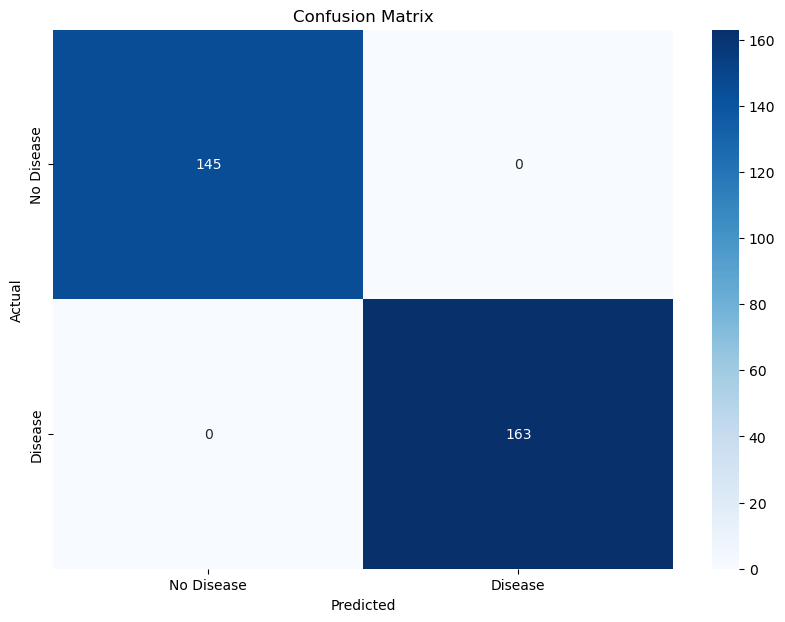

In [275]:
con_mat = confusion_matrix(Y_test, grid_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['No Disease', 'Disease'], 
             yticklabels=['No Disease', 'Disease'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [276]:
#To create a classification report
from sklearn.metrics import classification_report
class_report = classification_report(Y_test,grid_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [277]:
#f1 score
from sklearn.metrics import f1_score
f1_macro=f1_score(Y_test,grid_pred,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}: 1.0


In [291]:
from sklearn.metrics import roc_auc_score #Receiver Operating Characteristic Curve, Area Under the curve
roc_auc_score(Y_test,grid.predict_proba(X_test)[:,1]) # to get a greater probability value, [:,1][R,C]


1.0

In [293]:
# 'age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'

In [ ]:
Age = int(input("Age: "))
Chest_pain_type = int(input("cp: "))
Cholestrol_level = float(input("chol: "))
Maximum_heart_rate_achieved= float(input("thalach: "))
ST_depression_induced = float(input("oldpeak: "))
number_of_major_vessels_colored_by_flourosopy = int(input("ca: "))
thal= int(input("thal: "))

##### Age = int(input("Age: "))
Chest_pain_type = int(input("cp: "))
Cholestrol_level = float(input("chol: "))
Maximum_heart_rate_achieved= float(input("thalach: "))
ST_depression_induced = float(input("oldpeak: "))
number_of_major_vessels_colored_by_flourosopy = int(input("ca: "))
thal= int(input("thal: "))

In [296]:
Final_prediction =grid.predict([[Age,Chest_pain_type,Cholestrol_level,Maximum_heart_rate_achieved,ST_depression_induced,number_of_major_vessels_colored_by_flourosopy,thal]])
print("Final_prediction of Random Forest: {}".format(Final_prediction))

NameError: name 'Age' is not defined

In [298]:
if Final_prediction == 1:
    print("Heart disease Detected")
else:
    print("Disease not detected")

NameError: name 'Final_prediction' is not defined

In [300]:

# Saving the model
import pickle
filename= "heart_disease_model.sav"

In [ ]:
pickle.dump(grid,open(filename,'wb'))
load_model=pickle.load(open("heart_disease_model.sav",'rb'))

In [ ]:

def get_categorical_prediction(prediction):
    return "Yes, Heart disease detected" if prediction == 1 else "No,Disease not detected"

Age = int(input("Age: "))
Chest_pain_type = int(input("cp: "))
Cholestrol_level = float(input("chol: "))
Maximum_heart_rate_achieved= float(input("thalach: "))
ST_depression_induced = float(input("oldpeak: "))
number_of_major_vessels_colored_by_flourosopy = int(input("ca: "))
thal= int(input("thal: "))

In [ ]:
Final_result = load_model.predict([[Age,Chest_pain_type,Cholestrol_level,Maximum_heart_rate_achieved,ST_depression_induced,number_of_major_vessels_colored_by_flourosopy,thal]])
Final_result

In [ ]:

future_prediction_categorical = get_categorical_prediction(Final_result)
# future_prediction_categorical

In [ ]:

# Print the categorical prediction
print("The patient affected by disease:", future_prediction_categorical)

#### Deployement

In [ ]:
import pickle
import pickle
load_model=pickle.load(open("heart_disease_model.sav",'rb'))
def get_categorical_prediction(prediction):
    return "Yes, Heart disease detected" if prediction == 1 else "No,Disease not detected"

Age = int(input("Age: "))
Chest_pain_type = int(input("cp: "))
Cholestrol_level = float(input("chol: "))
Maximum_heart_rate_achieved= float(input("thalach: "))
ST_depression_induced = float(input("oldpeak: "))
number_of_major_vessels_colored_by_flourosopy = int(input("ca: "))
thal= int(input("thal: "))

Final_result = load_model.predict([[Age,Chest_pain_type,Cholestrol_level,Maximum_heart_rate_achieved,ST_depression_induced,number_of_major_vessels_colored_by_flourosopy,thal]])

# Final_result

future_prediction_categorical = get_categorical_prediction(Final_result)
# future_prediction_categorical

# Print the categorical prediction
print("The patient affected by disease:", future_prediction_categorical)